# Q) 1.0 Dataset Generation

Generate 10,000 student records with the following attributes:

- gender: Male (65%), Female (33%), Other (2%) 

- major: B.Tech (70%), MS (20%), PhD (10%) 

- program

- GPA

In [1]:
import pandas as pd
import numpy as np

# The numpy.random module implements pseudo-random number generators with the ability to draw samples from a variety of probability distributions.

# Referred Numpy documentation link : https://numpy.org/doc/stable/reference/random/index.html




class StudentDataset:
    def __init__(self, num_students: int, seed: int):
        
        np.random.seed(seed)
        self.num_students = num_students

        # Generate all attributes once during initialization
        self.genders = self.generate_gender()
        self.majors = self.generate_major()
        self.programs = self.generate_program(self.majors)
        self.gpas = self.generate_gpa(self.majors)
        self.dataset = self.assemble_dataframe()

    def generate_gender(self) -> list[str]:
        genders = np.random.choice(
            ['Male', 'Female', 'Other'],
            size=self.num_students,
            p=[0.65, 0.33, 0.02]
        )
        return genders.tolist()

    def generate_major(self) -> list[str]:
        majors = np.random.choice(
            ['B.Tech', 'MS', 'PhD'],
            size=self.num_students,
            p=[0.70, 0.20, 0.10]
        )
        return majors.tolist()

    def generate_program(self, majors: list[str]) -> list[str]:
        programs = []
        for major in majors:
            if major == 'B.Tech':
                programs.append(np.random.choice(['CSE', 'ECE', 'CHD', 'CND'], p=[0.4, 0.4, 0.1, 0.1]))
            elif major == 'MS':
                programs.append(np.random.choice(['CSE', 'ECE', 'CHD', 'CND'], p=[0.3, 0.3, 0.2, 0.2]))
            elif major == 'PhD':
                programs.append(np.random.choice(['CSE', 'ECE', 'CHD', 'CND'], p=[0.25, 0.25, 0.25, 0.25]))
        return programs

    def generate_gpa(self, majors: list[str]) -> list[float]:
        gpas = []
        for major in majors:
            if major == 'B.Tech':
                gpa = np.random.normal(7.0, 1.0)
            elif major == 'MS':
                gpa = np.random.normal(8.0, 0.7)
            elif major == 'PhD':
                gpa = np.random.normal(8.3, 0.5)
            # Clip GPA to [4.0, 10.0]
            gpa = np.clip(gpa, 4.0, 10.0)
            gpas.append(round(float(gpa), 2))
        return gpas

    def assemble_dataframe(self) -> pd.DataFrame:
        df = pd.DataFrame({
            'Gender': self.genders,
            'Major': self.majors,
            'Program': self.programs,
            'GPA': self.gpas
        })
        return df

    def get_full_dataframe(self) -> pd.DataFrame:
        return self.dataset


In [2]:
dataset = StudentDataset(num_students=10000, seed=42)
df = dataset.get_full_dataframe()

In [4]:
print(f"Shape of dataset : {df.shape}")
df.head()

Shape of dataset : (10000, 4)


,Gender,Major,Program,GPA
0,Male,B.Tech,ECE,6.37
1,Female,B.Tech,CSE,9.14
2,Female,B.Tech,CSE,8.67
3,Male,B.Tech,ECE,7.73
4,Male,B.Tech,ECE,6.66


In [17]:
print(f"GPA VALUE COUNTS : {df['GPA'].value_counts()}")

GPA VALUE COUNTS : GPA
7.77    56
7.89    48
7.15    47
7.43    47
7.78    46
        ..
4.79     1
9.92     1
4.38     1
4.40     1
9.70     1
Name: count, Length: 550, dtype: int64


## Q 1.1) Dataset Analysis

### a) Visualization 

In [8]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:


class StudentDatasetVisualizer:
    def __init__(self, dataset: pd.DataFrame):
        """Initialize with the student dataset."""
        self.dataset = dataset
        sns.set(style="whitegrid", palette="Set2")

    def plot_gender_distribution(self):
        """Show gender distribution."""
        plt.figure(figsize=(5,5))
        plt.pie(
            self.dataset['Gender'].value_counts(),
            labels=self.dataset['Gender'].value_counts().index,
            autopct='%1.1f%%',
            colors=sns.color_palette("pastel"),
            startangle=90
        )
        plt.title('Gender Distribution')
        plt.show()

    def plot_major_distribution(self):
        """Show distribution of students across majors."""
        plt.figure(figsize=(7,5))
        major_counts = self.dataset['Major'].value_counts().reset_index()
        major_counts.columns = ['Major', 'Count']
        sns.barplot(data=major_counts, x='Major', y='Count', palette='crest')
        plt.title('Major-wise Student Count')
        plt.xlabel('Major')
        plt.ylabel('Count')
        plt.xticks(rotation=30)
        plt.show()

    def plot_program_distribution(self):
        """Show distribution of students across programs."""
        plt.figure(figsize=(7,5))
        prog_counts = self.dataset['Program'].value_counts().reset_index()
        prog_counts.columns = ['Program', 'Count']
        sns.barplot(data=prog_counts, x='Program', y='Count', palette='viridis')
        plt.title('Program-wise Student Count')
        plt.xlabel('Program')
        plt.ylabel('Count')
        plt.show()

    def plot_gpa_distribution(self, bins: int = 15):
        """Visualize GPA distribution."""
        plt.figure(figsize=(6,5))
        sns.histplot(self.dataset['GPA'], bins=bins, kde=True, color='crimson', alpha=0.7)
        plt.title('GPA Distribution')
        plt.xlabel('GPA')
        plt.ylabel('Number of Students')
        plt.show()

    def plot_program_by_major(self):
        """Show program distribution across majors."""
        plt.figure(figsize=(7,5))
        crosstab = pd.crosstab(self.dataset['Major'], self.dataset['Program'])
        sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
        plt.title('Program Distribution across Majors')
        plt.xlabel('Program')
        plt.ylabel('Major')
        plt.show()

    def plot_gpa_by_major(self):
        """Compare GPA across majors."""
        plt.figure(figsize=(7,5))
        sns.violinplot(data=self.dataset, x='Major', y='GPA', inner='quartile', palette='muted')
        plt.title('GPA Distribution across Majors')
        plt.xlabel('Major')
        plt.ylabel('GPA')
        plt.xticks(rotation=25)
        plt.show()

    def plot_gpa_by_program(self):
        """Compare GPA across programs."""
        plt.figure(figsize=(7,5))
        sns.violinplot(data=self.dataset, x='Program', y='GPA', inner='quartile', palette='cool')
        plt.title('GPA Distribution across Programs')
        plt.xlabel('Program')
        plt.ylabel('GPA')
        plt.show()

    def plot_gpa_by_program_and_major(self):
        """Visualize GPA conditioned on both program and major."""
        plt.figure(figsize=(8, 5))
        sns.pointplot(
            data=self.dataset,
            x='Major', y='GPA',
            hue='Program', dodge=True,
            markers=['o', 's', 'D', '^'],
            ci='sd', linestyles='--'
        )
        plt.title('Average GPA by Program and Major')
        plt.xlabel('Major')
        plt.ylabel('Average GPA')
        plt.legend(title='Program', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=20)
        plt.tight_layout()
        plt.show()

        
    def plot_sampled_dataset(self):
        """Show 100 randomly sampled students with their Gender, Major, Program, and GPA."""
        sample_df = self.dataset.sample(min(100, len(self.dataset)), random_state=42)

        print("\nSample of 100 Students (first 10 shown):")
        print(sample_df[['Gender', 'Major', 'Program', 'GPA']].head(10))

        plt.figure(figsize=(9, 5))
        sns.scatterplot(
        data=sample_df,
        x='Major', y='GPA',
        hue='Program',
        style='Gender',
        s=80, alpha=0.8,
        palette='Set2'
    )

        plt.title('GPA Distribution of 100 Random Students', fontsize=13, fontweight='bold')
        plt.xlabel('Major')
        plt.ylabel('GPA')
        plt.xticks(rotation=15)
        plt.legend(title='Program / Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()



    def plot_dataset_summary(self):
        """Show a simple pairplot summarizing numeric relationships in the dataset."""
        numeric_cols = self.dataset.select_dtypes(include='number').columns.tolist()

        plt.pairplot(self.dataset, hue='Major', vars=numeric_cols, palette='Set2')
        plt.suptitle('Dataset Summary by Major', y=1.02)
        plt.show()
        




In [46]:
visualizer = StudentDatasetVisualizer(df)

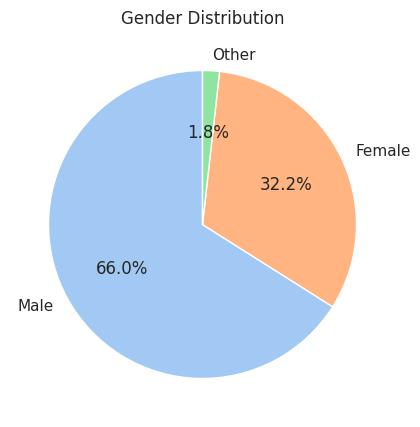

/tmp/ipykernel_9075/2347922470.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=major_counts, x='Major', y='Count', palette='crest')


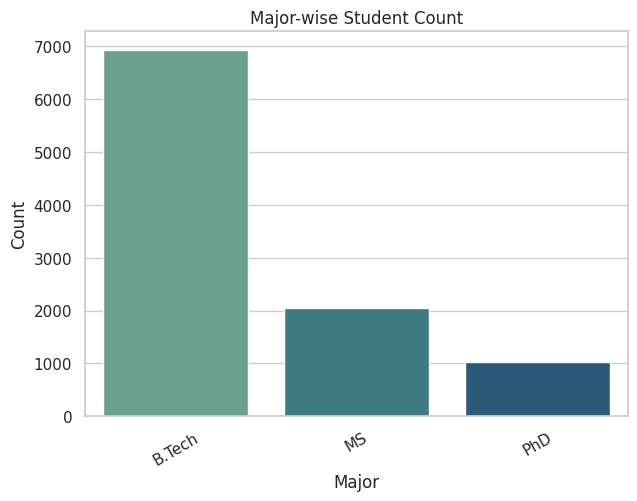

/tmp/ipykernel_9075/2347922470.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prog_counts, x='Program', y='Count', palette='viridis')


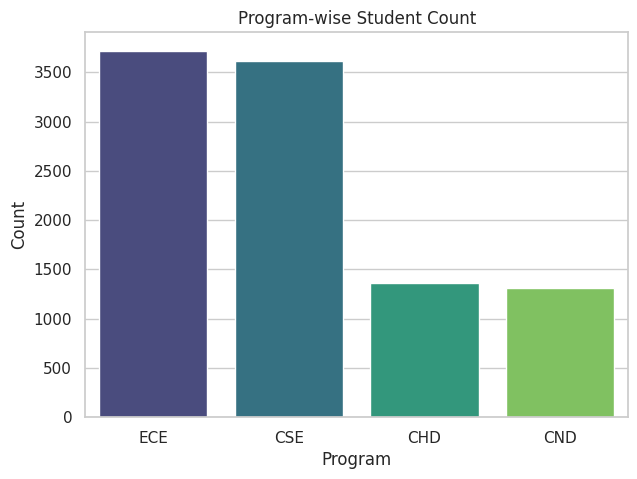

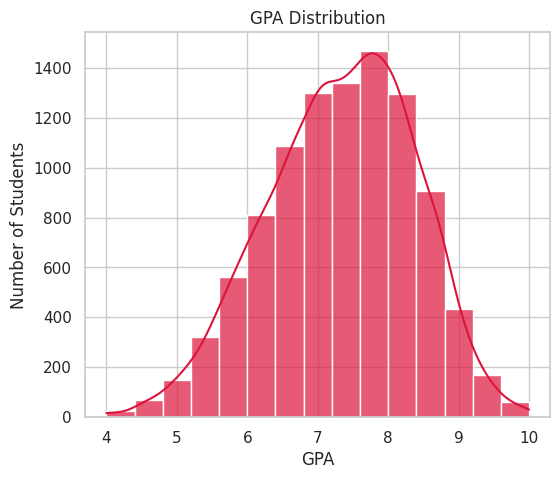

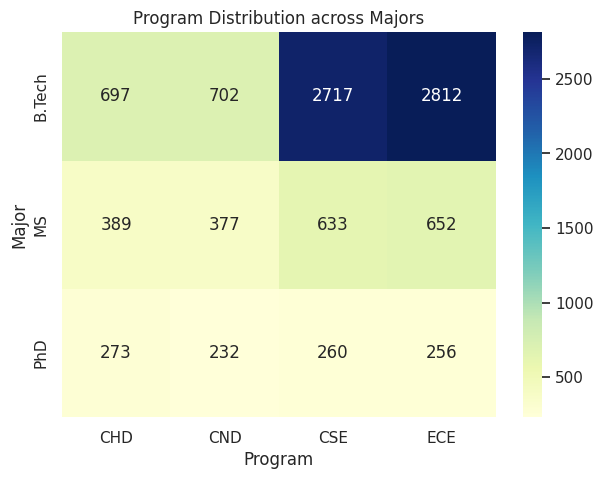

/tmp/ipykernel_9075/2347922470.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=self.dataset, x='Major', y='GPA', inner='quartile', palette='muted')


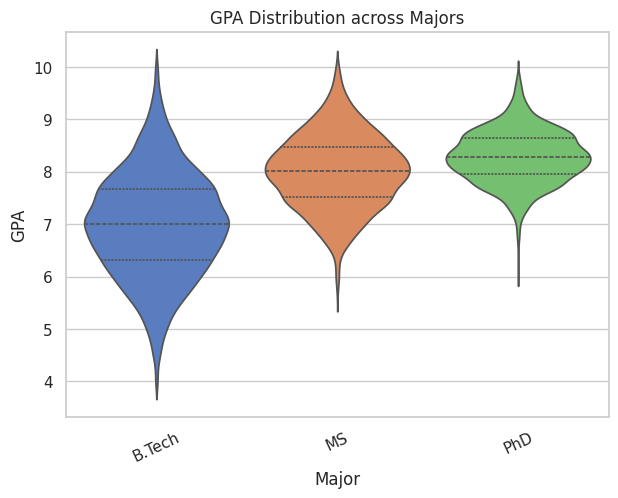

/tmp/ipykernel_9075/2347922470.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=self.dataset, x='Program', y='GPA', inner='quartile', palette='cool')


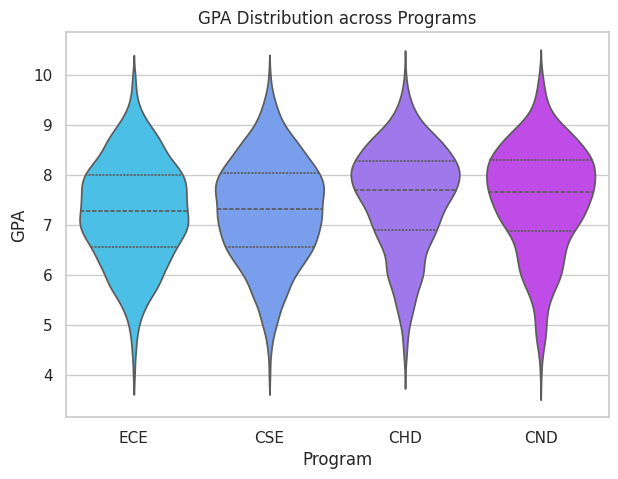

/tmp/ipykernel_9075/2347922470.py:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(


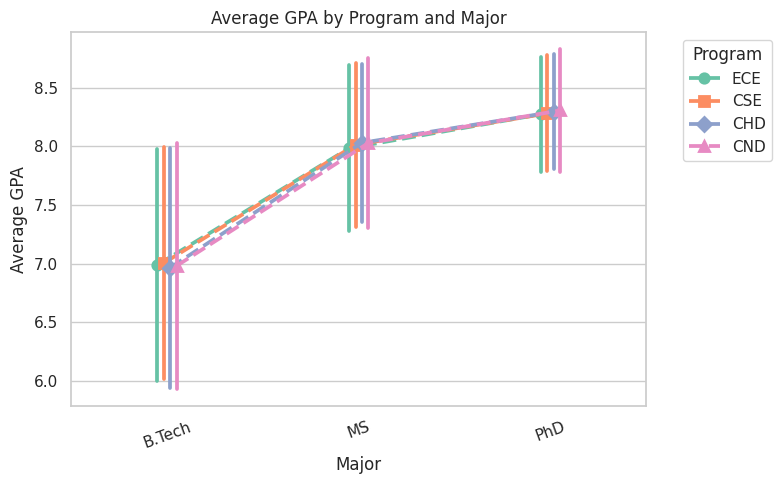


Sample of 100 Students (first 10 shown):
      Gender   Major Program   GPA
6252    Male  B.Tech     CND  7.33
4684  Female      MS     CSE  7.33
1731    Male  B.Tech     CND  8.61
4742    Male      MS     CSE  8.09
4521    Male     PhD     ECE  9.26
6340    Male  B.Tech     ECE  8.10
576     Male     PhD     CND  7.84
5202    Male  B.Tech     ECE  5.93
6363    Male  B.Tech     CSE  5.83
439     Male  B.Tech     CSE  6.82


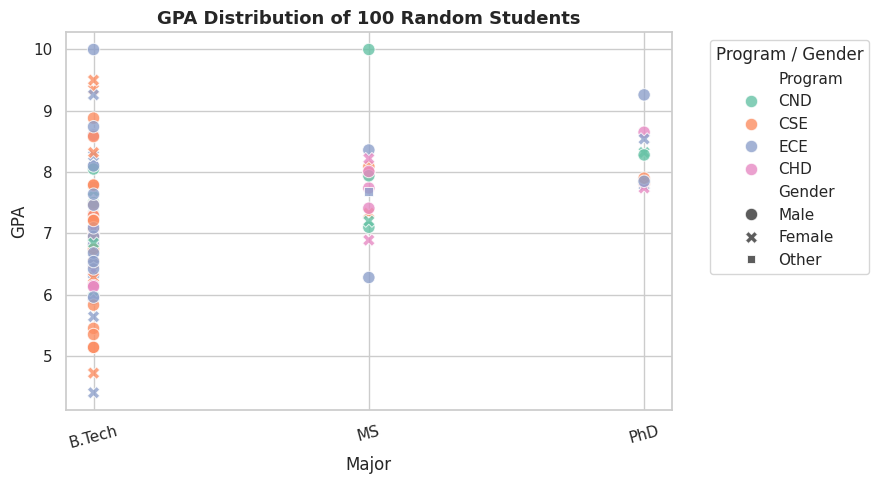

AttributeError: module 'matplotlib.pyplot' has no attribute 'pairplot'

In [47]:
# Gender distribution
visualizer.plot_gender_distribution()

#  Major distribution
visualizer.plot_major_distribution()

#  Program distribution
visualizer.plot_program_distribution()

#  GPA histogram (you used countplot, but histogram is better for continuous data)
visualizer.plot_gpa_distribution()

#  Program conditioned on Major
visualizer.plot_program_by_major()

#  GPA conditioned on Major
visualizer.plot_gpa_by_major()

#  GPA conditioned on Program
visualizer.plot_gpa_by_program()

#  GPA conditioned on both Program and Major
visualizer.plot_gpa_by_program_and_major()

#  Sampled dataset visualization (100 random students)
visualizer.plot_sampled_dataset()

#  Overall dataset summary
visualizer.plot_dataset_summary()


### (b) GPA Summary Statistics [1 mark]


Define a method to compute the mean and standard deviation of GPA:

In [51]:
def gpa_mean_std() -> tuple[float, float]:
    """Compute and return the mean and standard deviation of GPA."""
    gpa_mean = df['GPA'].mean()
    gpa_std = df['GPA'].std()
    
    print(f"\nGPA Summary Statistics:")
    print(f"Mean GPA: {gpa_mean:.2f}")
    print(f"Standard Deviation: {gpa_std:.2f}")
    
    # Basic observation
    if gpa_std < 0.3:
        print("Observation: GPAs are tightly clustered — students have similar performance.")
    elif gpa_std < 0.6:
        print("Observation: Moderate variation — noticeable but not extreme performance differences.")
    else:
        print("Observation: High variation — wide range of academic performance among students.")
    
    return gpa_mean, gpa_std

gpa_mean_std()



GPA Summary Statistics:
Mean GPA: 7.33
Standard Deviation: 1.04
Observation: High variation — wide range of academic performance among students.


(np.float64(7.332147), np.float64(1.041597366019274))

### (c) Program-Major Combinations


Define a method to count the number of students for each unique (program, major) pairs.
Also write a method to visualize it with a heatmap.

In [58]:
def count_students_per_program_major_pair() -> pd.DataFrame:
    """Count number of students in each (Program, Major) pair."""
    counts_df = (
        df.groupby(['Program', 'Major'])
        .size()
        .reset_index(name='Student_Count')
    )

    print("\nStudents per (Program, Major) pair:")
    print(counts_df.head(10))
    return counts_df


def visualize_students_per_program_major_pair(counts_df: pd.DataFrame) -> None:
    """Visualize student counts for each (Program, Major) pair using a heatmap."""
    pivot_df = counts_df.pivot(index='Major', columns='Program', values='Student_Count')

    plt.figure(figsize=(7, 5))
    sns.heatmap(
        pivot_df,
        annot=True,
        fmt='g',
        cmap='coolwarm',
        linewidths=0.5,
        cbar_kws={'label': 'Number of Students'}
    )
    plt.title('Students per Program-Major Combination', fontsize=13, fontweight='bold')
    plt.xlabel('Program')
    plt.ylabel('Major')
    plt.tight_layout()
    plt.show()



Students per (Program, Major) pair:
  Program   Major  Student_Count
0     CHD  B.Tech            697
1     CHD      MS            389
2     CHD     PhD            273
3     CND  B.Tech            702
4     CND      MS            377
5     CND     PhD            232
6     CSE  B.Tech           2717
7     CSE      MS            633
8     CSE     PhD            260
9     ECE  B.Tech           2812


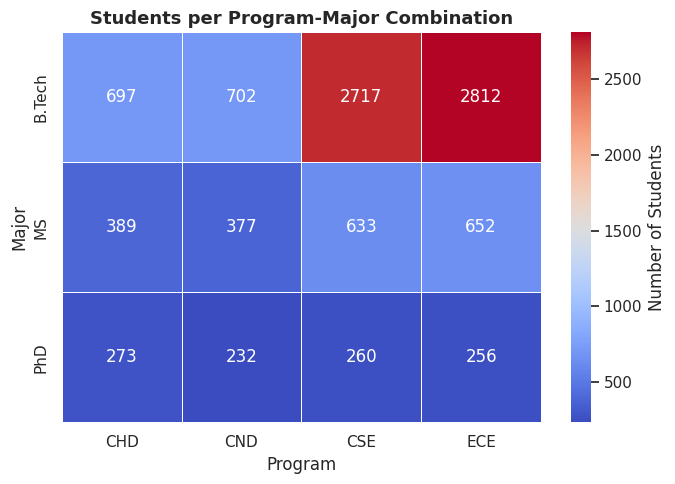

In [59]:
counts_df = count_students_per_program_major_pair()
visualize_students_per_program_major_pair(counts_df)

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

.

## Q1.2 Simple vs Stratified Sampling

- Sample 500 students uniformly at random. Repeat 50 times. Calculate the mean
GPA and standard deviation for each sample. Report the average mean GPA and the
standard deviation of the mean GPAs across the 50 repetitions.

- Repeat using stratified sampling by major (divide population into strata by major
based on their proportion in the dataset). Compare the results.

- Which method has lower std deviation? Why? 

In [61]:
def get_gpa_mean_std_random(dataset: pd.DataFrame, n: int = 500, repeats: int = 50) -> tuple[float, float]:
    """
    Simple Random Sampling:
    Draw n random students (repeated 'repeats' times),
    and compute the average of mean GPAs and their std deviation.
    """
    mean_gpas = []

    for i in range(repeats):
        sample = dataset.sample(n=min(n, len(dataset)), random_state=i)
        mean_gpas.append(sample['GPA'].mean())

    avg_mean = np.mean(mean_gpas)
    std_of_means = np.std(mean_gpas)

    print(f"\nSimple Random Sampling Results:")
    print(f"Average of Mean GPAs across {repeats} samples: {avg_mean:.3f}")
    print(f"Standard Deviation of Mean GPAs: {std_of_means:.4f}")
    return avg_mean, std_of_means


def get_gpa_mean_std_stratified(dataset: pd.DataFrame, n: int = 500, repeats: int = 50) -> tuple[float, float]:
    """
    Stratified Sampling by 'Major':
    Divide dataset by major and sample proportionally from each group.
    """
    mean_gpas = []
    majors = dataset['Major'].value_counts(normalize=True)

    for i in range(repeats):
        samples = []
        for major, proportion in majors.items():
            major_df = dataset[dataset['Major'] == major]
            n_major = int(round(proportion * n))
            if n_major > 0:
                sample_major = major_df.sample(n=n_major, replace=True, random_state=i)
                samples.append(sample_major)

        stratified_sample = pd.concat(samples)
        mean_gpas.append(stratified_sample['GPA'].mean())

    avg_mean = np.mean(mean_gpas)
    std_of_means = np.std(mean_gpas)

    print(f"\nStratified Sampling Results (by Major):")
    print(f"Average of Mean GPAs across {repeats} samples: {avg_mean:.3f}")
    print(f"Standard Deviation of Mean GPAs: {std_of_means:.4f}")
    return avg_mean, std_of_means


In [62]:
mean_random, std_random = get_gpa_mean_std_random(df)
mean_strat, std_strat = get_gpa_mean_std_stratified(df)

print("\nComparison:")
print(f"Random Sampling Std Deviation   : {std_random:.4f}")
print(f"Stratified Sampling Std Deviation: {std_strat:.4f}")

if std_strat < std_random:
    print("\nStratified sampling gives lower variability — because it maintains each major’s representation.")
else:
    print("\nRandom sampling showed slightly lower deviation this time (rare).")



Simple Random Sampling Results:
Average of Mean GPAs across 50 samples: 7.338
Standard Deviation of Mean GPAs: 0.0433

Stratified Sampling Results (by Major):
Average of Mean GPAs across 50 samples: 7.338
Standard Deviation of Mean GPAs: 0.0422

Comparison:
Random Sampling Std Deviation   : 0.0433
Stratified Sampling Std Deviation: 0.0422

Stratified sampling gives lower variability — because it maintains each major’s representation.


------------------------------------------------------------------------------------------------------------------------------------------------------------

.


## Q1.3 Gender-Balanced Cohort

- Sample 300 students with exact same count across genders. Repeat 5 times. Report gender counts. 

- Consider the following Sampling Strategy A: Randomly pick a value from a discrete set of categories with equal probability (here, gender). Randomly pick a student from that category. Sample 300 students using this sampling strategy. Repeat 5 times. Report gender counts. 

- For each sample size (300, 600, 900, 1200, 1500), repeat the above sampling process 10 times. In each repeat, count the number of students in each gender, find the difference between the largest and smallest counts, and divide by the sample size (n) to get the maximum relative difference. Compute the average of these values over the 10 repeats for each sample size. Plot a histogram of average maximum relative difference (y-axis)
versus sample size (x-axis). 


In [69]:
def get_gender_balanced_counts(df, n=300, repeats=5):
    gender_counts_list = []
    genders = df['Gender'].unique()
    per_gender = n // len(genders)

    for _ in range(repeats):
        samples = []
        for g in genders:
            samples.append(df[df['Gender'] == g].sample(per_gender, replace=False))
        combined = pd.concat(samples)
        counts = combined['Gender'].value_counts().to_dict()
        gender_counts_list.append(counts)

    return gender_counts_list


def sample_gender_uniform_random(df, n=300, repeats=5):
    genders = df['Gender'].unique()
    gender_counts_list = []

    for _ in range(repeats):
        chosen_genders = np.random.choice(genders, size=n, replace=True)
        samples = []
        for g in chosen_genders:
            samples.append(df[df['Gender'] == g].sample(1))
        combined = pd.concat(samples)
        counts = combined['Gender'].value_counts().to_dict()
        gender_counts_list.append(counts)

    return gender_counts_list

def plot_avg_max_gender_diff_vs_sample_size(df, sample_sizes=[300, 600, 900, 1200, 1500], repeats=10):
    avg_diffs = []

    for n in sample_sizes:
        diffs = []
        for _ in range(repeats):
            counts_list = sample_gender_uniform_random(df, n, 1)
            counts = counts_list[0]
            max_diff = (max(counts.values()) - min(counts.values())) / n
            diffs.append(max_diff)
        avg_diffs.append(np.mean(diffs))

    # Plotting
    plt.figure(figsize=(7,5))
    plt.plot(sample_sizes, avg_diffs, marker='o')
    plt.title("Average Maximum Relative Gender Difference vs Sample Size")
    plt.xlabel("Sample Size (n)")
    plt.ylabel("Average Max Relative Difference")
    plt.grid(True)
    plt.show()


In [70]:
get_gender_balanced_counts(df)

[{'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100}]

In [71]:
sample_gender_uniform_random(df, n=300, repeats=5)

[{'Female': 106, 'Male': 98, 'Other': 96},
 {'Female': 112, 'Male': 102, 'Other': 86},
 {'Male': 113, 'Female': 95, 'Other': 92},
 {'Female': 121, 'Other': 92, 'Male': 87},
 {'Male': 103, 'Female': 102, 'Other': 95}]

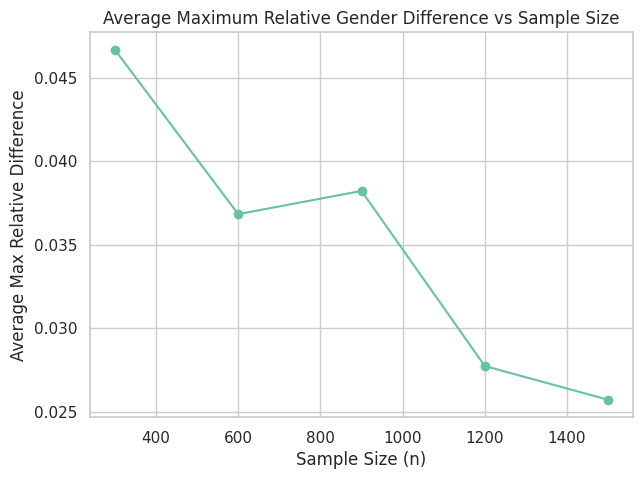

In [73]:
plot_avg_max_gender_diff_vs_sample_size(df)

____________________________________________________________________________________________________________________________________________________________________

## Q1.4 GPA-Uniform Cohort

- Using Sampling Strategy A, select 100 students such that their GPA values are approximately uniformly distributed across 10 bins. 

- Plot GPA histogram and compare to original dataset’s histogram. 

- Did you sample with or without replacement? Why? 



In [76]:
def sample_gpa_uniform(dataset: pd.DataFrame, n: int = 100, bins: int = 10) -> pd.DataFrame:

    # Create bins across the GPA range
    dataset['GPA_bin'] = pd.cut(dataset['GPA'], bins=bins, include_lowest=True)
    
    # Compute students per bin (uniform target)
    bin_counts = dataset['GPA_bin'].value_counts().sort_index()
    target_per_bin = max(1, n // bins)
    
    sampled_students = []
    
    for gpa_bin, group_df in dataset.groupby('GPA_bin'):
        if len(group_df) == 0:
            continue  # skip empty bins
        
        # If not enough samples, sample with replacement
        replace_flag = len(group_df) < target_per_bin
        sampled_group = group_df.sample(target_per_bin, replace=replace_flag, random_state=np.random.randint(0, 10000))
        sampled_students.append(sampled_group)
    
    sampled_df = pd.concat(sampled_students, ignore_index=True)
    
    # In case total < n due to rounding, add extra random samples
    if len(sampled_df) < n:
        extra_needed = n - len(sampled_df)
        extra_samples = dataset.sample(extra_needed, replace=True, random_state=42)
        sampled_df = pd.concat([sampled_df, extra_samples], ignore_index=True)
    
    # Remove helper column before returning
    sampled_df = sampled_df.drop(columns=['GPA_bin'], errors='ignore')
    return sampled_df.head(n)
    

def plot_gpa_histogram_comparison(dataset: pd.DataFrame, sampled_df: pd.DataFrame) -> None:
    """
    Plot histogram comparison between original GPA distribution and sampled uniform cohort.
    """
    plt.figure(figsize=(9, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(dataset['GPA'], bins=10, kde=True, color='skyblue')
    plt.title('Original GPA Distribution')
    plt.xlabel('GPA')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.histplot(sampled_df['GPA'], bins=10, kde=True, color='salmon')
    plt.title('Uniform GPA Sample Distribution')
    plt.xlabel('GPA')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_9075/2324707545.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for gpa_bin, group_df in dataset.groupby('GPA_bin'):


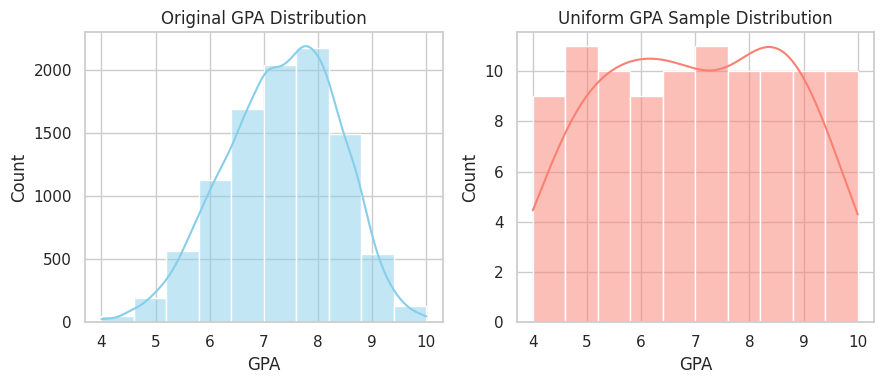

In [78]:
sampled_df = sample_gpa_uniform(df, n=100, bins=10)
plot_gpa_histogram_comparison(df, sampled_df)


____________________________________________________________________________________________________________________________________________________________________

.

## Q1.5 Program-Major Balanced Cohort

- Using Sampling Strategy A, select 60 students such that all valid (program, major)
combinations are represented approximately equally. 

- Show counts and heatmap. 

- Were any groups too small? How did you handle it


Counts of Students per (Program, Major):

Major    B.Tech  MS  PhD
Program                 
CHD           5   5    5
CND           5   5    5
CSE           5   5    5
ECE           5   5    5


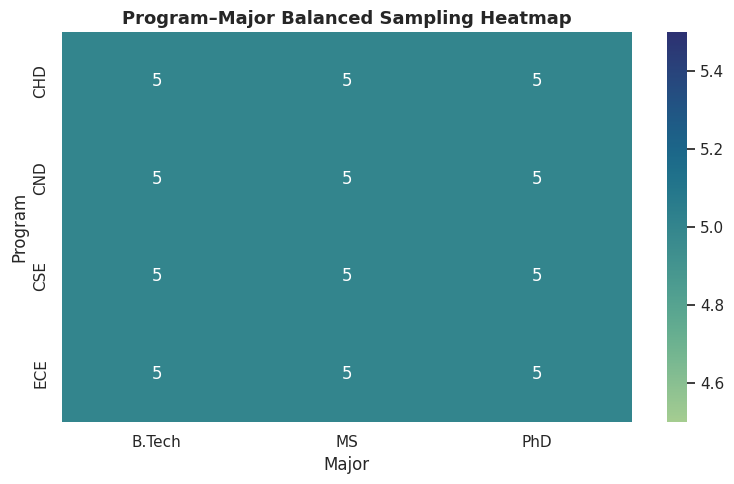

In [75]:
sampled_df = sample_program_major_balanced(df, n=60)
show_program_major_counts_and_heatmap(sampled_df)
